 ---
 # Prática 4: Análisis en el dominio del tiempo (DT) del circuito serie de primer orden R-C. Carga y Descarga de un Condesador.
 ---
> Autores: Jorge del Río López, Carlos González García y Javier Rodríguez Urbano.
>
> Fecha: 2024-11-26
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


In [1083]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
# Definimos el valor de Pi
Pi = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093

In [1084]:
# Importamos el fichero que contiene los datos.
xlsx_name="P5_PlantillaMedidasEstudiantes.ods"

In [1085]:
#Creamos una funcion para convertir n listas en arrays.
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)

def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

#Funcioón que usaremos para calcular errores relativos.
def ErrorRelativo(exp,teor):
    return (abs(exp - teor)/abs(teor))*100
# Funcion que realiza un ajuste lineal.
def AjusteLineal(x1,x2,y1,y2):
    x1 = 2*Pi*x1
    x2 = 2*Pi*x2
    alfa = x2-x1
    beta = y2-y1
    intercep = -(beta/alfa)*x1 + y1
    pendiente = beta/alfa

    return pendiente, intercep

def ValorR(pendiente, intercep,frecu):
    return frecu*pendiente + intercep


---
<h1 style="text-align: center;">[P4.C1]</h1>

---


In [1086]:
DatosParte1 = pd.read_excel(xlsx_name,sheet_name="RC")

# Extraemos los valores:

ValorResistencia = DatosParte1["R"].tolist()
ValorCondensador = DatosParte1["C"].tolist()


# Extraemos los valores Teóricos y Prácticos.

#--------------------------------------------------------------
#Resistencia
#--------------------------------------------------------------

ResistenciaTeo = ValorResistencia[0]
ResistenciaPra = ValorResistencia[1]

#--------------------------------------------------------------
# Capacidad
#--------------------------------------------------------------

CapacidadTeo = ValorCondensador[0]
CapacidadPra = ValorCondensador[1]


# Calculo del valor del tiempo de Relajación teórico.

TiempoRelajacionTeo = ResistenciaTeo*CapacidadTeo

# Calculo del valor del tiempo de Relajación práctico.

TiempoRelajacionPra = ResistenciaPra*CapacidadPra

print(f'La Resistencia teórica es: {round(ResistenciaTeo,2)} Ohms.')
print(f'La Resistencia práctica es: {round(ResistenciaPra,2)} Ohms.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(ResistenciaPra,ResistenciaTeo),2)} %.\n')

print(f'La Capacidad teórica es: {CapacidadTeo} F.')
print(f'La Capacidad práctica es: {CapacidadPra} F.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(CapacidadPra,CapacidadTeo),2)} %.\n')


print(f'El tiempo de relajación Teórica es: {round(TiempoRelajacionTeo,2)} s.')
print(f'El tiempo de relajación Práctica es: {round(TiempoRelajacionPra,2)} s.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(TiempoRelajacionPra,TiempoRelajacionTeo),2)} %.')

La Resistencia teórica es: 10000 Ohms.
La Resistencia práctica es: 9930 Ohms.
Esto nos proporciona un error relativo del: 0.7 %.

La Capacidad teórica es: 0.0047 F.
La Capacidad práctica es: 0.00413 F.
Esto nos proporciona un error relativo del: 12.13 %.

El tiempo de relajación Teórica es: 47.0 s.
El tiempo de relajación Práctica es: 41.01 s.
Esto nos proporciona un error relativo del: 12.74 %.


---
<h1 style="text-align: center;">[P4.C2]</h1>

---

$log(1-\dfrac{v_c}{V_s})\ =\ \dfrac{log(e)}{\tau}\ t -\ \dfrac{t_0}{\tau}log(e) $

In [1087]:
DatosParte2 = pd.read_excel(xlsx_name,sheet_name="DatosEnTiempo")

# Extraemos los valores:
Tiempo = DatosParte2["t"].tolist()
VoltajeCondensador = DatosParte2["vc"].tolist()
VoltajeFuentelist = DatosParte2["Vs"].tolist()
VoltajeFuente =  VoltajeFuentelist[0]
Tiempo, VoltajeCondensador = ConverArray2(Tiempo,VoltajeCondensador)

Datos ajuste: R= 0.01373118079889366 1/s 
Ordenada en el origen:  0.2341604216019739 QQ 
 coorel coef= [[ 2.69770922e-08 -2.68422067e-06]
 [-2.68422067e-06  3.55211869e-04]]


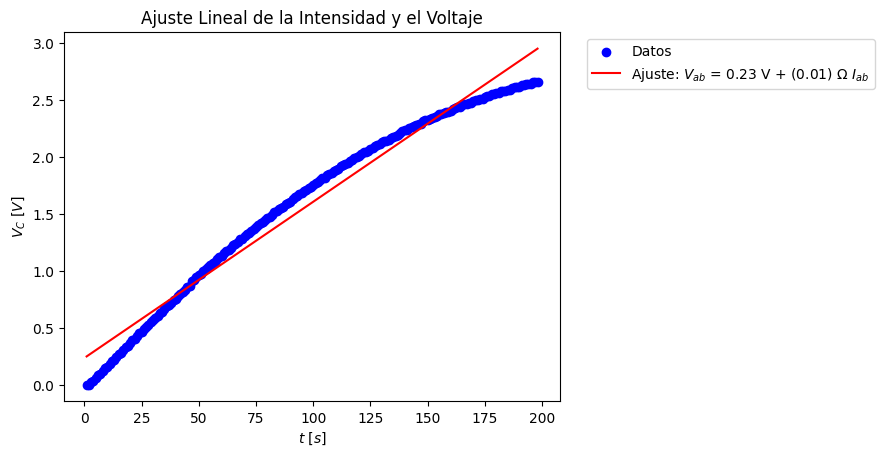

In [1088]:
VoltajeCondensadorCarga = VoltajeCondensador[0:198].copy()
VoltajeCondensadorDesCarga = VoltajeCondensador[198:350].copy()

TiempoCarga = Tiempo[0:198].copy()
TiempoDesCarga = Tiempo[198:350].copy()
#Ponemos los datos en una tabla.

data = {'t[s]': TiempoCarga,
        'Vc[V]': VoltajeCondensadorCarga}
df = pd.DataFrame(data)
#print(f'Datos:\n{df}\n')
# Obtenemos los valores de la abcisas
yCarga = []
for i in VoltajeCondensadorCarga:
   #yCarga.append(np.log(1-(i/VoltajeFuente)))
   #yCarga.append((VoltajeFuente/(VoltajeFuente-i))**(8/13))
   yCarga.append(np.log((VoltajeFuente/(VoltajeFuente-i))))


# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slope, intercept], r = np.polyfit(TiempoCarga,yCarga,deg=1,cov=True)
print("R=", slope,"1/s","\nOrdenada en el origen: ", intercept,"QQ","\n coorel coef=",r)
# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return slope * x + intercept  

# Graficamos los datos y el ajuste lineal
plt.scatter(TiempoCarga, yCarga, label='Datos', color='blue')
plt.plot(TiempoCarga, ajuste_lineal(TiempoCarga), color='red', label=fr'Ajuste: $V_{{ab}}$ = {intercept:.2f} V + ({slope:.2f}) $\Omega$ $I_{{ab}}$')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title('Ajuste Lineal de la Intensidad y el Voltaje')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [1089]:
# A partir de los datos de la Ordenada en el origen y de la pendiente obtenemos los valores de C y tau.

TauPracticaCarga = 1/slope

# Calculamos el valor de C
CapacidadPracticaCarga = TauPracticaCarga/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaCarga,2)} s.')
print(f'El tiempo de relajación Teórica es: {round(CapacidadPracticaCarga,4)} F.')

El tiempo de relajación Teórica es: 72.83 s.
El tiempo de relajación Teórica es: 0.0073 F.


---
<h1 style="text-align: center;">[P4.C3]</h1>

---


Datos:
     t[s]  Vc[V]
0     199  9.302
1     200  9.244
2     201  9.123
3     202  8.890
4     203  8.665
..    ...    ...
147   346  0.497
148   347  0.486
149   348  0.480
150   349  0.470
151   350  0.459

[152 rows x 2 columns]

Datos ajuste: R= -0.020029119463241866 1/s 
Ordenada en el origen:  3.90867426360618 QQ 
 coorel coef= [[ 3.56964536e-10 -9.79867652e-08]
 [-9.79867652e-08  2.75846130e-05]]


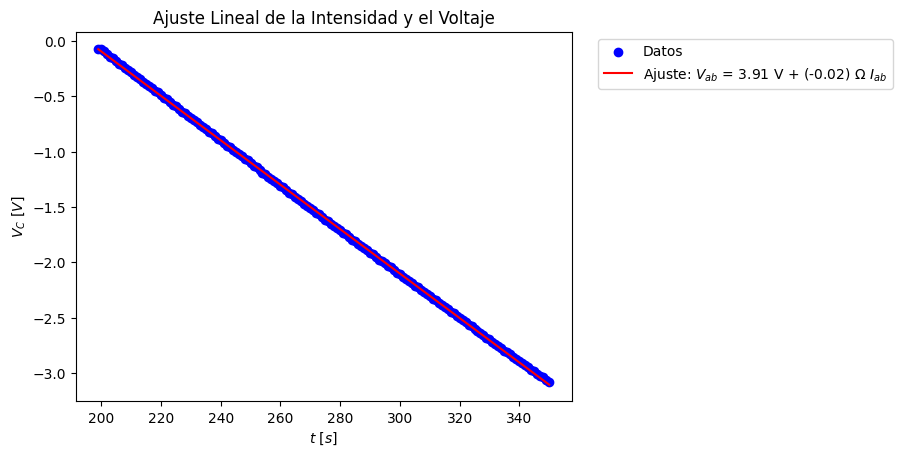

In [1090]:
#Ponemos los datos en una tabla.
data = {'t[s]': TiempoDesCarga,
        'Vc[V]': VoltajeCondensadorDesCarga}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')
# Obtenemos los valores de la abcisas
yDescarga = []
for i in VoltajeCondensadorDesCarga:
    yDescarga.append(np.log((i/VoltajeFuente)))

# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slope, intercept], r = np.polyfit(TiempoDesCarga,yDescarga,deg=1,cov=True)
print("R=", slope,"1/s","\nOrdenada en el origen: ", intercept,"QQ","\n coorel coef=",r)

# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return intercept + slope * x

# Graficamos los datos y el ajuste lineal
plt.scatter(TiempoDesCarga, yDescarga, label='Datos', color='blue')
plt.plot(TiempoDesCarga, ajuste_lineal(TiempoDesCarga), color='red', label=fr'Ajuste: $V_{{ab}}$ = {intercept:.2f} V + ({slope:.2f}) $\Omega$ $I_{{ab}}$')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title('Ajuste Lineal de la Intensidad y el Voltaje')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [1091]:
# A partir de los datos de la Ordenada en el origen y de la pendiente obtenemos los valores de C y tau.

TauPracticaDesCarga = 1/slope

# Calculamos el valor de C
CapacidadPracticaDesCarga = TauPracticaDesCarga/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaDesCarga,2)} s.')
print(f'El tiempo de relajación Teórica es: {round(CapacidadPracticaDesCarga,5)} F.')

El tiempo de relajación Teórica es: -49.93 s.
El tiempo de relajación Teórica es: -0.00503 F.


---
<h1 style="text-align: center;">[P4.C4]</h1>

---



En este apartado nos encargaremos de hacer el digrama de Bode del condensador.

Debido a la fórmula del calculo de fase: $\Delta\phi\ =\ arcsin\left(\dfrac{a}{b}\right).$ nos dimos cuenta que a partir de la frecuencia de resonancia la fase para este caso tomaba un desfase de $-\pi$ en el valor original. Este hecho se lo adjudicamos a que la fase ha de ser continua y ya que tras la frecuencia de resonancia el parámetro $\dfrac{a}{b}$ disminuye en modulo, es necesario añadir este desfase, haciendo que la fase pueda situarse entre [0,$-\pi$]. Como en el diagrama de Bode.

En este caso no se pueden apreciar las líneas rectas de las frecuencias de corte ya que no disponemos de la situación donde las impedancias complejas del Condensador y la Bobina se anulen, debido a estar analizando el voltaje de salida de la Capacitancia.

In [1092]:
DatosParteC4 = pd.read_excel(xlsx_name,sheet_name='C4',usecols='A:E')
# Recogemos los datos del excel.

FrecuenciaCond = DatosParteC4["f(kHz)"].tolist()
VoltajeFuente2 = DatosParteC4["Ve(V)"].tolist()
VoltajeConden = DatosParteC4["VC(V)"].tolist()
ValorA2 = DatosParteC4["a"].tolist()
ValorB2 = DatosParteC4["b"].tolist()

ValueError: Worksheet named 'C4' not found

In [ ]:
# Convertimos las listas en arrays
FrecuenciaCond,ValorA2,ValorB2 = ConverArray3(FrecuenciaCond,ValorA2,ValorB2)
VoltajeFuente2,VoltajeConden = ConverArray2(VoltajeFuente2,VoltajeConden)

# Definimos la frecuencia angular como:
FrecuenciaAnguPra = []
FrecuenciaAnguPra = FrecuenciaCond.copy()*(2*Pi*1000)


In [ ]:
# Definimos "u" como w/w0.
u = 0
for i in FrecuenciaAnguPra:
    i = float(i)
    u = i/FrecuenciaResonanciaTeo
    FrecuenciaResonanciaAngularCond.append(u)
    # Calculo de los Modulos

    ModuloTCTeo.append(1/(math.sqrt((1-(u**2))**2 + (2*FactorAmortiguadorTeo*u)**2)))
    ModuloTCTeo2.append(1/(math.sqrt((1-(u**2))**2 + (2*FactorAmortiguadorTeo2*u)**2)))

    # Calculo de las Fases


    if math.atan((2*FactorAmortiguadorTeo*u)/(1-(u**2)))>0:
        FaseTCTeo.append(-math.atan((2*FactorAmortiguadorTeo*u)/(1-(u**2))))
    else:
        FaseTCTeo.append(math.atan(abs((2*FactorAmortiguadorTeo*u)/(1-(u**2)))) - Pi)

    if math.atan((2*FactorAmortiguadorTeo2*u)/(1-(u**2)))>0:
        FaseTCTeo2.append(-math.atan((2*FactorAmortiguadorTeo2*u)/(1-(u**2))))
    else:
        FaseTCTeo2.append(math.atan(abs((2*FactorAmortiguadorTeo2*u)/(1-(u**2)))) - Pi)

#----------------------------------------------------------------------------------------------------------------------------------
# Calculamos los modulos y fases prácticos.
#----------------------------------------------------------------------------------------------------------------------------------


j = 0
for i in VoltajeFuente2:
    # Calculo del modulo
    ModuloTCPrac.append(VoltajeConden[j]/i)
    j += 1
j = 0
for i in ValorA2:
    i = float(i)
    k = float(ValorB2[j])
    # Calculamos la fase.
    if i/k <0:
        FaseTCPrac.append(math.asin(i/k))
    else:
        FaseTCPrac.append(math.asin(i/k) - (Pi))
    j += 1

for i in range(0,len(ModuloTCTeo)):
    EpsilonC1.append(ErrorRelativo(ModuloTCPrac[i],ModuloTCTeo[i]))
    EpsilonC2.append(ErrorRelativo(ModuloTCPrac[i],ModuloTCTeo2[i]))

#Ponemos los datos en una tabla.
data = {'TC Exper.': ModuloTCPrac,
        'TC Teor.': ModuloTCTeo,
        'Epsilon(%)': EpsilonC1,
        'TC Experi.': ModuloTCPrac,
        'TC Teor. (L)': ModuloTCTeo2,
        'Epsilon (L) (%)': EpsilonC2}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')

Datos:
    TC Exper.  TC Teor.  Epsilon(%)  TC Experi.  TC Teor. (L)  Epsilon (L) (%)
0    1.013514  1.002781    1.070261    1.013514      1.002485         1.100082
1    1.054054  1.024331    2.901731    1.054054      1.021634         3.173324
2    1.164384  1.126273    3.383800    1.164384      1.109491         4.947526
3    1.465753  1.451269    0.998036    1.465753      1.355933         8.099260
4    1.638889  1.590353    3.051921    1.638889      1.444361        13.468058
5    1.888889  1.838748    2.726923    1.888889      1.575758        19.871746
6    2.222222  2.181696    1.857558    2.222222      1.699295        30.773170
7    2.470588  2.319148    6.529999    2.470588      1.604372        53.991008
8    2.176471  2.043951    6.483514    2.176471      1.462712        48.796909
9    1.527778  1.497990    1.988504    1.527778      1.175507        29.967507
10   1.323944  1.273158    3.988981    1.323944      1.041116        27.165834
11   0.972222  0.926105    4.979741    0.9722

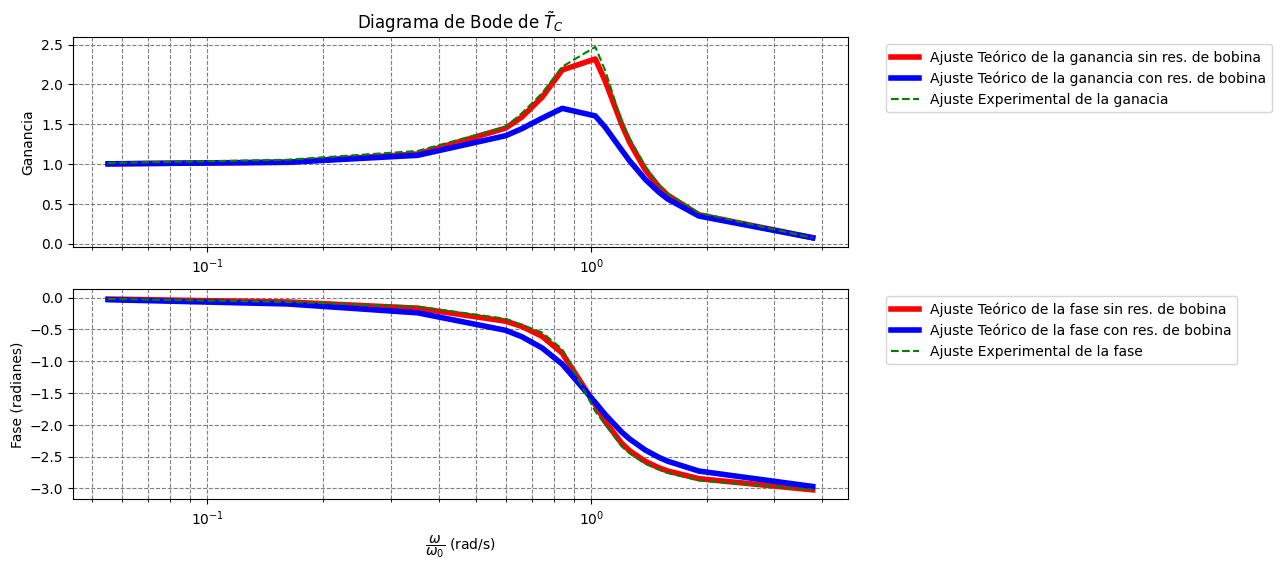

In [ ]:
# Representamos los diagramas de Bode.

#----------------------------------------------------------------
# Teórico
#----------------------------------------------------------------

GananciaTeoC = []# Este lista tomara el valor de la ganancia teórica
for i in ModuloTCTeo:
    GananciaTeoC.append(abs(i))

GananciaTeoC2 = []# Este lista tomara el valor de la ganancia teórica
for i in ModuloTCTeo2:
    GananciaTeoC2.append(abs(i))
#----------------------------------------------------------------
# Práctico
#----------------------------------------------------------------

GananciaPracC = []# Este lista tomara el valor de la ganancia práctica
for i in ModuloTCPrac:
    GananciaPracC.append(abs(i))

# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(FrecuenciaResonanciaAngularCond, GananciaTeoC,label="Ajuste Teórico de la ganancia sin res. de bobina",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, GananciaTeoC2,label="Ajuste Teórico de la ganancia con res. de bobina",color="blue",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, GananciaPracC,label='Ajuste Experimental de la ganacia',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.title(r"Diagrama de Bode de $\~{T}_C$")
plt.ylabel("Ganancia")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaResonanciaAngularCond, FaseTCTeo,label="Ajuste Teórico de la fase sin res. de bobina",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, FaseTCTeo2,label="Ajuste Teórico de la fase con res. de bobina",color="blue",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaResonanciaAngularCond, FaseTCPrac,label='Ajuste Experimental de la fase',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel(r"$\dfrac{\omega}{\omega_0} $ (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()